# Case Study: Sentiment Analysis

### Data Prep

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sys
import csv
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import roc_auc_score

In [2]:
# Read in the data
df1 = pd.read_csv('post_comments_df.csv')
df1.head()

,Subreddit,PostTitle,PostMonth,Comment
0,r/Economics,"If the U.S. Is in a Recession, It’s a Very Str...",2022-07-01,"Someone please correct me, but doesn't that se..."
1,r/Economics,"If the U.S. Is in a Recession, It’s a Very Str...",2022-07-01,"Once again, no one actually reads the article...."
2,r/Economics,"If the U.S. Is in a Recession, It’s a Very Str...",2022-07-01,Its paycuts instead of layoffs. Overall salari...
3,r/Economics,"If the U.S. Is in a Recession, It’s a Very Str...",2022-07-01,I was wondering the same thing. How the hell c...
4,r/Economics,"If the U.S. Is in a Recession, It’s a Very Str...",2022-07-01,The job market is not strong uniformly. While ...


In [4]:
#importing necessary libraries
from afinn import Afinn

#instantiate afinn
afn = Afinn()

PostTitles = df1['PostTitle']
Comments = df1['Comment']
PostMonths = df1['PostMonth']

#creating list sentences
# news_df = ['les gens pensent aux chiens','i hate flowers','hes kind and smart','we are kind to good people']
    
# compute scores (polarity) and labels
post_title_scores = [afn.score(text) for text in PostTitles]
post_comment_scores = [afn.score(text) for text in Comments]

post_sentiments = ['positive' if score > 0
             else 'negative' if score < 0
             else 'neutral'
             for score in post_title_scores]

comment_sentiments = ['positive' if score > 0
             else 'negative' if score < 0
             else 'neutral'
             for score in post_comment_scores]
          

In [5]:
# dataframe creation
df1_2 = pd.DataFrame({'PostMonth': PostMonths, 'PostTitle': PostTitles, 'Comment': Comments, 'PostTitleScore': post_title_scores, 'PostSentiment': post_sentiments, 'CommentScore': post_comment_scores, 'CommentSentiment': comment_sentiments})
df1_2['PostMonth'] = pd.to_datetime(df1_2['PostMonth'])
df1_2

,PostMonth,PostTitle,Comment,PostTitleScore,PostSentiment,CommentScore,CommentSentiment
0,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...","Someone please correct me, but doesn't that se...",-1.0,negative,-15.0,negative
1,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...","Once again, no one actually reads the article....",-1.0,negative,-29.0,negative
2,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...",Its paycuts instead of layoffs. Overall salari...,-1.0,negative,-2.0,negative
3,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...",I was wondering the same thing. How the hell c...,-1.0,negative,-10.0,negative
4,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...",The job market is not strong uniformly. While ...,-1.0,negative,4.0,positive
...,...,...,...,...,...,...,...
1741,2022-01-01,Data science job market is shrinking,It's shrinking for real. Coz lots positions ar...,0.0,neutral,0.0,neutral
1742,2022-01-01,Data science job market is shrinking,Overall I think the market hasn't changed much...,0.0,neutral,1.0,positive
1743,2022-01-01,Data science job market is shrinking,Made up an [infographic](https://infogram.com/...,0.0,neutral,-1.0,negative
1744,2022-01-01,Data science job market is shrinking,literally any and every STEM major with a modi...,0.0,neutral,7.0,positive


In [6]:
df1_3 = df1_2.groupby(['PostMonth'])['PostTitleScore','CommentScore'].mean()
df1_3

/var/folders/kj/ym0ghsln6y34n55vwsjd8ltm0000gn/T/ipykernel_5193/2338267856.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_3 = df1_2.groupby(['PostMonth'])['PostTitleScore','CommentScore'].mean()


,PostTitleScore,CommentScore
PostMonth,,
2022-01-01,0.672619,0.113095
2022-02-01,-1.773585,1.249057
2022-03-01,0.043478,0.934783
2022-04-01,-3.380282,0.859155
2022-05-01,1.404372,-0.131148
2022-06-01,-0.657658,0.777778
2022-07-01,-1.090395,-1.028249
2022-08-01,0.453488,-0.104651
2022-09-01,-2.815385,0.184615


In [7]:
df1_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2022-01-01 to 2022-11-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PostTitleScore  11 non-null     float64
 1   CommentScore    11 non-null     float64
dtypes: float64(2)
memory usage: 264.0 bytes


In [8]:
df1_3.describe()

,PostTitleScore,CommentScore
count,11.000000,11.000000
mean,-0.774215,0.211635
std,1.456649,0.678000
min,-3.380282,-1.028249
25%,-1.431990,-0.125098
50%,-0.657658,0.113095
75%,0.248483,0.818466
max,1.404372,1.249057


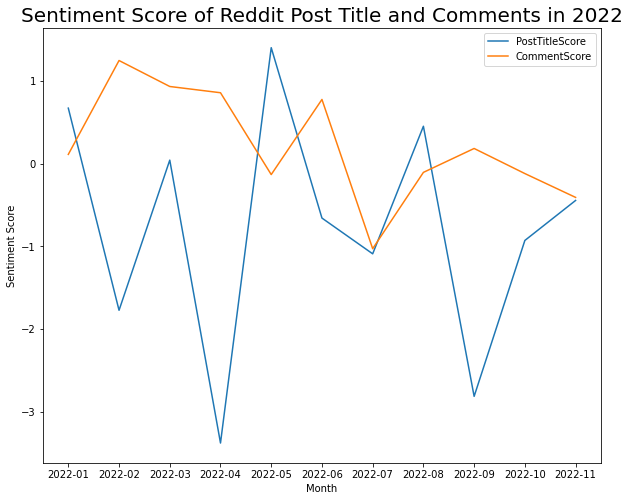

In [9]:
Months = ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11']

plt.figure(figsize = (10, 8))
sns.lineplot(data = df1_3, x = Months, y = "PostTitleScore", label = 'PostTitleScore')
sns.lineplot(data = df1_3, x = Months, y = "CommentScore", label = 'CommentScore')
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.title('Sentiment Score of Reddit Post Title and Comments in 2022', fontsize = 20)
plt.show()


In [10]:
df1_2.head()

,PostMonth,PostTitle,Comment,PostTitleScore,PostSentiment,CommentScore,CommentSentiment
0,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...","Someone please correct me, but doesn't that se...",-1.0,negative,-15.0,negative
1,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...","Once again, no one actually reads the article....",-1.0,negative,-29.0,negative
2,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...",Its paycuts instead of layoffs. Overall salari...,-1.0,negative,-2.0,negative
3,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...",I was wondering the same thing. How the hell c...,-1.0,negative,-10.0,negative
4,2022-07-01,"If the U.S. Is in a Recession, It’s a Very Str...",The job market is not strong uniformly. While ...,-1.0,negative,4.0,positive


In [11]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df1_2['Comment'], 
                                                    df1_2['CommentScore'],
                                                    test_size = 0.25,
                                                    random_state=0)

In [12]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 So, yes, it’s a tight labor market. But the tightness is in part due to the labor market (depressed prime age LF, COVID deaths, unhappiness with previous industries) so that workers will switch to find better wages and/or benefits and/or schedules.

However; there are some considerable non-market constraints (childcare) that are leading to these outcomes. 

Also, let me point out that the difference between openings and quits has to be interpreted with caution. When trying to attract workers, businesses will often over-advertise open positions.


X_train shape:  (1309,)


# CountVectorizer
Bag of words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer()

In [14]:
vect.get_feature_names_out()[::2000]

array(['00', 'deficit', 'lived', 'shared'], dtype=object)

In [15]:
len(vect.get_feature_names())

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7448

In [16]:
# transform the documents in the training and testing data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
print(X_train_vectorized)
X_test_vectorized = vect.transform(X_test)
print(X_test_vectorized)

  (0, 606)	1
  (0, 631)	1
  (0, 683)	1
  (0, 722)	3
  (0, 814)	2
  (0, 890)	1
  (0, 1012)	1
  (0, 1065)	1
  (0, 1071)	1
  (0, 1073)	1
  (0, 1273)	1
  (0, 1278)	1
  (0, 1378)	1
  (0, 1451)	1
  (0, 1710)	1
  (0, 1725)	1
  (0, 1838)	1
  (0, 1964)	1
  (0, 2057)	1
  (0, 2123)	1
  (0, 2315)	1
  (0, 2794)	1
  (0, 3220)	1
  (0, 3373)	1
  (0, 3507)	1
  :	:
  (1308, 2228)	1
  (1308, 2820)	1
  (1308, 3127)	1
  (1308, 3230)	1
  (1308, 3698)	1
  (1308, 3706)	1
  (1308, 3737)	1
  (1308, 3768)	1
  (1308, 3806)	1
  (1308, 4061)	1
  (1308, 4716)	1
  (1308, 4846)	1
  (1308, 4887)	1
  (1308, 5585)	1
  (1308, 5899)	1
  (1308, 6081)	1
  (1308, 6583)	1
  (1308, 6683)	1
  (1308, 6700)	1
  (1308, 6711)	1
  (1308, 6720)	1
  (1308, 6749)	1
  (1308, 6871)	1
  (1308, 7273)	1
  (1308, 7420)	1
  (0, 491)	1
  (0, 669)	1
  (0, 691)	1
  (0, 814)	2
  (0, 1012)	2
  (0, 1032)	1
  (0, 1082)	1
  (0, 1285)	1
  (0, 1836)	1
  (0, 2446)	2
  (0, 2553)	1
  (0, 2621)	1
  (0, 2623)	1
  (0, 2904)	1
  (0, 2953)	1
  (0, 3003)	2
  (0,

In [17]:
# Train the KNN model
knnmodel = KNeighborsClassifier()

In [18]:
# Predict the transformed test documents using KNN model
metric = 'accuracy'
kf = model_selection.StratifiedKFold(n_splits=10)
cvres = model_selection.cross_val_score(knnmodel, X_train_vectorized, y_train, cv=kf, scoring=metric)
print('Accuracy of knn model is: ', cvres.mean())

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy of knn model is:  0.20243100411039344


In [19]:
# Train the navie bayes model
nbmodel = MultinomialNB()

In [20]:
# Predict the transformed test documents using decision tree regression model
metric = 'accuracy'
kf = model_selection.StratifiedKFold(n_splits=10)
cvres = model_selection.cross_val_score(nbmodel, X_train_vectorized, y_train, cv=kf, scoring=metric)
print('Accuracy of random naive bayes model is: ', cvres.mean())

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy of random naive bayes model is:  0.1802701115678215
